# pSTL example
This jupyter notebook was used to run the pSTL example, and used to produce the plots. 

In [2]:
%matplotlib inline
import sys
sys.path.append('../src')

import matplotlib.pyplot as plt

from torch.utils.data import Dataset, DataLoader

import numpy as np
import os
import pickle
import torch
import pickle
import stlcg

import scipy.io

In [3]:
import matplotlib
fontsize = 24
matplotlib.rc('xtick', labelsize=fontsize) 
matplotlib.rc('ytick', labelsize=fontsize) 

In [5]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
# for Palatino and other serif fonts use:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

### loading generated data.
Data was generated in matlab

In [4]:
mat = scipy.io.loadmat("models/clustering_data.mat")
ys_ = mat['ys']
ys = np.zeros(ys_.shape)
ys[:,:] = np.fliplr(ys_)     # flipped inputs to be ready for stlcg package
t = mat['T'][0,:]
N = ys.shape[0]

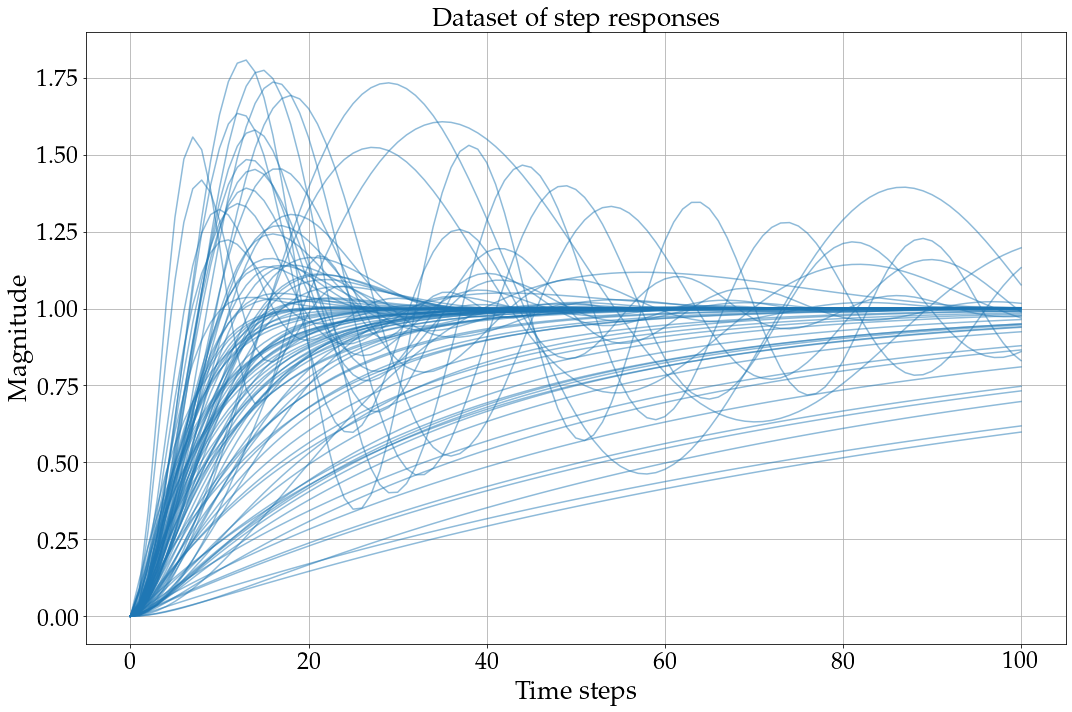

In [10]:
fs = 26
plt.figure(figsize=(15,10))
plt.plot(ys_[:100,:].T, c='#1f77b4', alpha=0.5)
plt.xlabel("Time steps", fontsize=fs)
plt.ylabel("Magnitude", fontsize=fs)
plt.title("Dataset of step responses", fontsize=fs)
plt.grid()
plt.tight_layout()

In [ ]:
# see pstl.py for code
from pstl import *

In [26]:
N = 10   # run the code for N samples

# settling stl
ϵs_settling = np.stack([binary_search_settling(ys[:N], None), stlcg_settling(ys[:N], None), stlcg_gpu_settling(ys[:N], None)])
# overshoot stl
ϵs_overshoot = np.stack([binary_search_overshoot(ys[:N], None), stlcg_overshoot(ys[:N], None), stlcg_gpu_overshoot(ys[:N], None)])

### Computation time comparison plot


Text(0.5, 1.0, 'Computation time for different batch sizes')

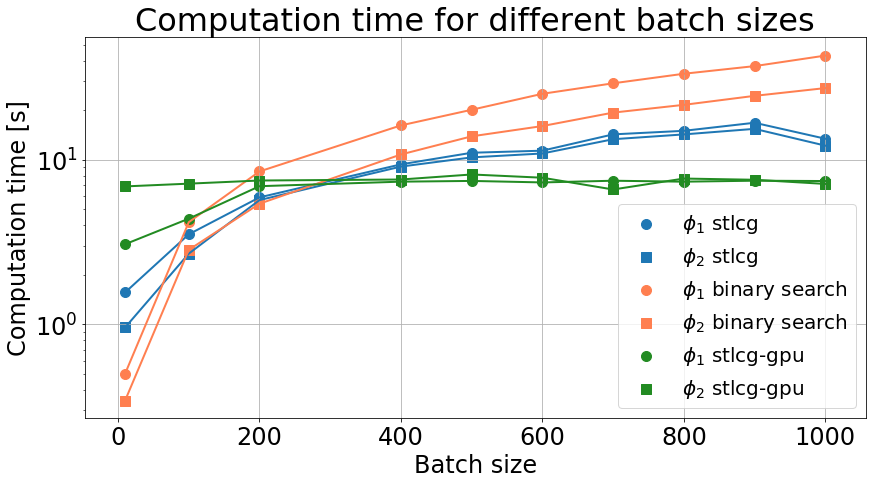

In [38]:
# computations were recorded previously, and saved in compute_times.txt
times = open("models/compute_times.txt","r") 
time_mat = np.zeros([6,11])
m = {1:0, 10:1, 100:2, 200:3, 400:4, 500:5, 600:6, 700:7, 800:8, 900:9, 1000:10}
for l in times:
    line = l.split(' ')
    typ = int(line[2])
    signal_len = m[int(line[3])]
    num = float(line[4])
    tim = line[12].split(":")
    if len(tim) == 2:
        tt = float(tim[0])*60 + float(tim[1])
    else:
        tt = float(tim[0])
    time_mat[typ-1, signal_len] = tt/num
    

signal_lengths = [10, 100, 200, 400, 500, 600, 700, 800, 900, 1000]

plt.figure(figsize=(14,7))

# plt.figure(figsize=(15, 7))
markersize = 100
linewidth = 2
fontsize = 24
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.plot(signal_lengths, time_mat[0,1:], c='#1f77b4', linewidth=linewidth)
plt.scatter(signal_lengths, time_mat[0,1:], label="$\phi_1$ stlcg", c='#1f77b4', s=markersize)

plt.plot(signal_lengths, time_mat[2,1:], c='#1f77b4', linewidth=linewidth)
plt.scatter(signal_lengths, time_mat[2,1:], label="$\phi_2$ stlcg", c='#1f77b4', s=markersize, marker='s')

plt.plot(signal_lengths, time_mat[1,1:], c="coral", linewidth=linewidth)
plt.scatter(signal_lengths, time_mat[1,1:], label="$\phi_1$ binary search", c="coral", s=markersize)

plt.plot(signal_lengths, time_mat[3,1:], c="coral", linewidth=linewidth)
plt.scatter(signal_lengths, time_mat[3,1:], label="$\phi_2$ binary search", c="coral", s=markersize, marker='s')

plt.plot(signal_lengths, time_mat[4,1:], c="forestgreen", linewidth=linewidth)
plt.scatter(signal_lengths, time_mat[4,1:], label="$\phi_1$ stlcg-gpu", c="forestgreen", s=markersize)

plt.plot(signal_lengths, time_mat[5,1:], c="forestgreen", linewidth=linewidth)
plt.scatter(signal_lengths, time_mat[5,1:], label="$\phi_2$ stlcg-gpu", c="forestgreen", s=markersize, marker='s')

plt.legend(fontsize=fontsize-4)
plt.yscale("log")
plt.grid()

plt.xlabel("Batch size", fontsize=fontsize)
plt.ylabel("Computation time [s]", fontsize=fontsize)
plt.title("Computation time for different batch sizes", fontsize=fontsize+8)
